In [24]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle
import sys
import pandas as pd

from sklearn import model_selection as ms
from sklearn import linear_model as lm
from scipy import stats


sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [2]:
### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "rb"))
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "rb"))

In [3]:
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

In [4]:
ages_train,\
ages_test,\
net_worths_train,\
net_worths_test = ms.train_test_split(ages, net_worths, 
                                      test_size=0.1, random_state=42)

In [5]:
reg = lm.LinearRegression()
reg.fit(ages_train, net_worths_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

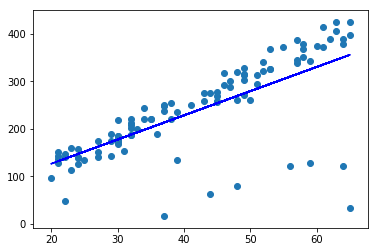

In [6]:
plt.plot(ages, reg.predict(ages), color="blue")
plt.scatter(ages, net_worths)
plt.show();

In [7]:
reg.coef_, reg.score(ages_test, net_worths_test)

(array([[5.07793064]]), 0.8782624703664671)

In [8]:
def outlierCleaner(predictions, ages, net_worths,limit = 0.9):
    """
    Return numpy 3D array with age, networth, error for every element of
    imputs
    """
    if not isinstance(ages, np.ndarray):
        ages = np.array(ages).reshape((len(ages),1))
    if not isinstance(net_worths, np.ndarray):
        net_worths = np.array(net_worths).reshape((len(net_worths),1))
    if not isinstance(predictions, np.ndarray):
        predictions = np.array(predictions).reshape((len(predictions),1))
    
    pred_error=np.array([[a[0],n[0],p[0]-n[0]] for a,n,p in zip(ages,net_worths,
                                                                predictions)])
    
    num_limit = int(len(pred_error)*limit)
    print(f'total data = {len(pred_error)}\nsmallest {num_limit} returned')
    
    cleaned_data = pred_error[pred_error[:,2].argsort()][:num_limit]
    
    return cleaned_data

In [9]:
cleaned_data = outlierCleaner(reg.predict(ages_train), ages_train, net_worths_train)

total data = 90
smallest 81 returned


In [10]:
ages       = numpy.reshape( cleaned_data[:,0], (len(cleaned_data[:,0]), 1))
net_worths = numpy.reshape( cleaned_data[:,1], (len(cleaned_data[:,1]), 1))

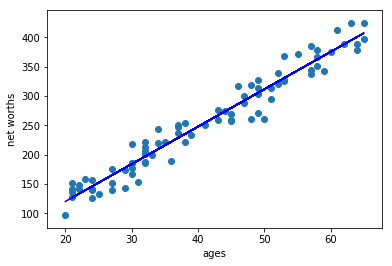

In [11]:
### refit your cleaned data!
#reg.fit(ages, net_worths)
reg.fit(ages,net_worths)
plt.plot(ages, reg.predict(ages), color="blue")
plt.scatter(ages, net_worths)
plt.xlabel("ages")
plt.ylabel("net worths")
plt.show()


In [12]:
reg.coef_, reg.score(ages_test, net_worths_test)

(array([[6.36859481]]), 0.9831894553955322)

# Enron outliers

In [15]:
### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "rb") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

In [48]:
def plot_scatter(data):
    plt.scatter(data[:,0], data[:,1])
    plt.xlabel("salary")
    plt.ylabel("bonus")
    plt.show()

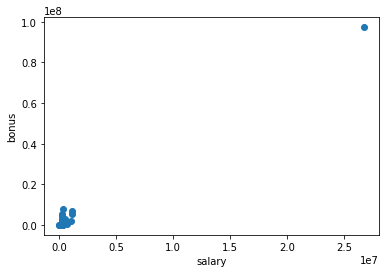

In [49]:
plot_scatter(data)

In [37]:
df = pd.DataFrame.from_dict(data_dict, orient='index')
df.reset_index(inplace=True)
df.rename(columns={'index':'full_name'}, inplace=True)

In [59]:
df['salary_rf'] = df.salary.astype(float)
df['bonus_rf'] = df.bonus.astype(float)

In [44]:
df.salary.size-(df.salary=='NaN').sum()

95

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 23 columns):
full_name                    146 non-null object
salary                       146 non-null object
to_messages                  146 non-null object
deferral_payments            146 non-null object
total_payments               146 non-null object
loan_advances                146 non-null object
bonus                        146 non-null object
email_address                146 non-null object
restricted_stock_deferred    146 non-null object
deferred_income              146 non-null object
total_stock_value            146 non-null object
expenses                     146 non-null object
from_poi_to_this_person      146 non-null object
exercised_stock_options      146 non-null object
from_messages                146 non-null object
other                        146 non-null object
from_this_person_to_poi      146 non-null object
poi                          146 non-null bool
long_term_incen

In [47]:
df[df.salary_rf==df.salary_rf.max()]

,full_name,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,...,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,salary_rf
130,TOTAL,26704229,NaN,32083396,309886585,83925000,97343619,NaN,-7576788,-27992891,...,311764000,NaN,42667589,NaN,False,48521928,NaN,130322299,1398517,26704229.0


In [53]:
cleaned_data = data[data[:,0].argsort()][:-1,:]

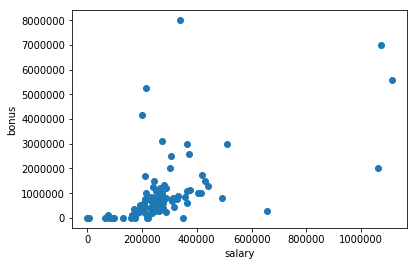

In [54]:
plot_scatter(cleaned_data)

In [58]:
df.query('salary_rf>1000000')[['full_name','salary','bonus']].sort_values(by='bonus')

,full_name,salary,bonus
47,FREVERT MARK A,1060932,2000000
122,SKILLING JEFFREY K,1111258,5600000
79,LAY KENNETH L,1072321,7000000
130,TOTAL,26704229,97343619


In [61]:
df.query('bonus_rf>7000000')[['full_name','salary','bonus']].sort_values(by='bonus')

,full_name,salary,bonus
78,LAVORATO JOHN J,339288,8000000
130,TOTAL,26704229,97343619
